<a href="https://colab.research.google.com/github/danisotoguerrero/Clasificaci-n-de-noticias-falsas/blob/main/Clasificaci%C3%B3n_de_noticias_falsas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El objetivo es utilizar estos datos para crear un algoritmo capaz de determinar si un artículo es una noticia falsa o no. Le proporcionamos 2 archivos, uno con noticias etiquetadas como falsas y otro con etiquetas de noticias que contienen información verdadera. Usted tienen cuatro columnas en cada archivo: título / texto / asunto / fecha.

In [ ]:
# Importamos las bibliotecas que sabemos que vamos a usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [ ]:
# Carga de datos
true_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectFN/data/true.csv")
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
# Carga de datos
fake_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectFN/data/fake.csv")
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# Preparación de los datos

A continuacion etiquetanmos las noticias falsas con el valor 0 y las verdaderas con el valor 1 en una columna nueva llamada "class". Esto es un paso importante para la clasificación supervisada, ya que le indica al modelo cómo categorizar o predecir las noticias según su autenticidad.

In [ ]:
fake_news["class"] = 0
true_news["class"] = 1

In [ ]:
fake_news.shape, true_news.shape # Devuelve el tamaño del conjunto de datos

((23481, 5), (21417, 5))

# Palabras mas utilizadas en ambos tipos de noticias.

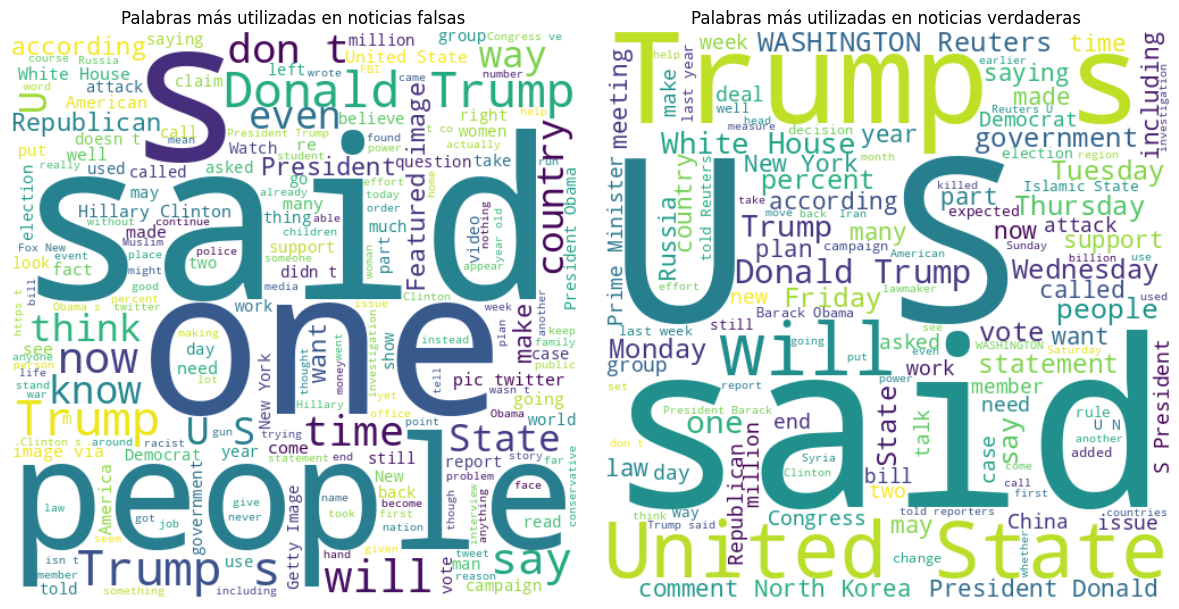

In [152]:
# importar wordcloud
from wordcloud import WordCloud

# Combinar el texto de las noticias falsas y verdaderas
all_text_fake = ' '.join(fake_news['text'].tolist())
all_text_true = ' '.join(true_news['text'].tolist())

# Generar WordCloud para las noticias falsas
wordcloud_fake = WordCloud(background_color='white', min_font_size=10, width=500, height=500).generate(all_text_fake)

# Generar WordCloud para las noticias verdaderas
wordcloud_true = WordCloud(background_color='white', min_font_size=10, width=500, height=500).generate(all_text_true)

# Mostrar las WordClouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Palabras más utilizadas en noticias falsas')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Palabras más utilizadas en noticias verdaderas')
plt.axis('off')

plt.tight_layout()
plt.show()


Podemos ver claramente en esta nube de palabras qué palabras se usan más en noticias verdaderas y falsas

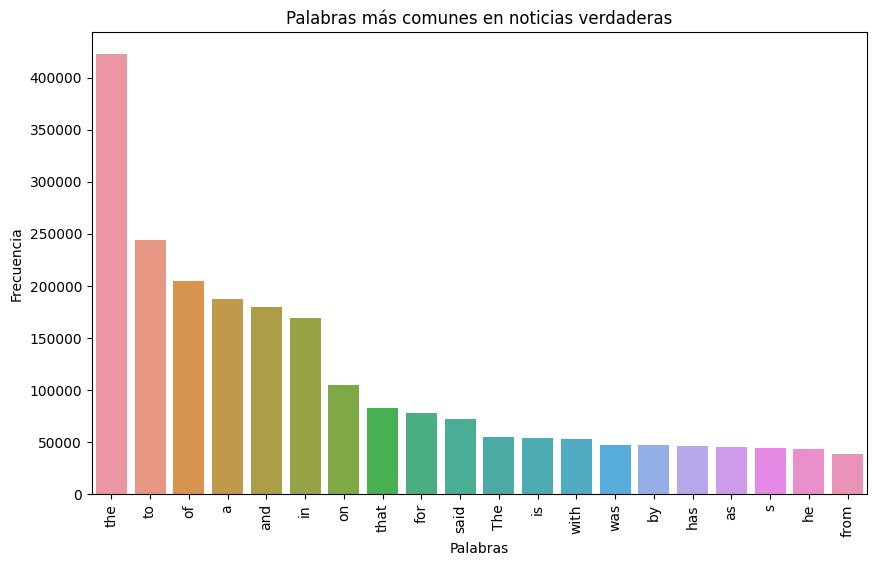

In [154]:
from collections import Counter

# Combinar el texto de las noticias verdaderas en una sola cadena
all_text_true = ' '.join(true_news['text'].tolist())

# Separar las palabras y contar su frecuencia
true_news_words_list = all_text_true.split()
word_counts = Counter(true_news_words_list)

# Obtener las 20 palabras más comunes y crear un DataFrame
true_news_words_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])

# Crear un gráfico de barras para visualizar las palabras más comunes en noticias verdaderas
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=true_news_words_df)
plt.xticks(rotation='vertical')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras más comunes en noticias verdaderas')
plt.show()


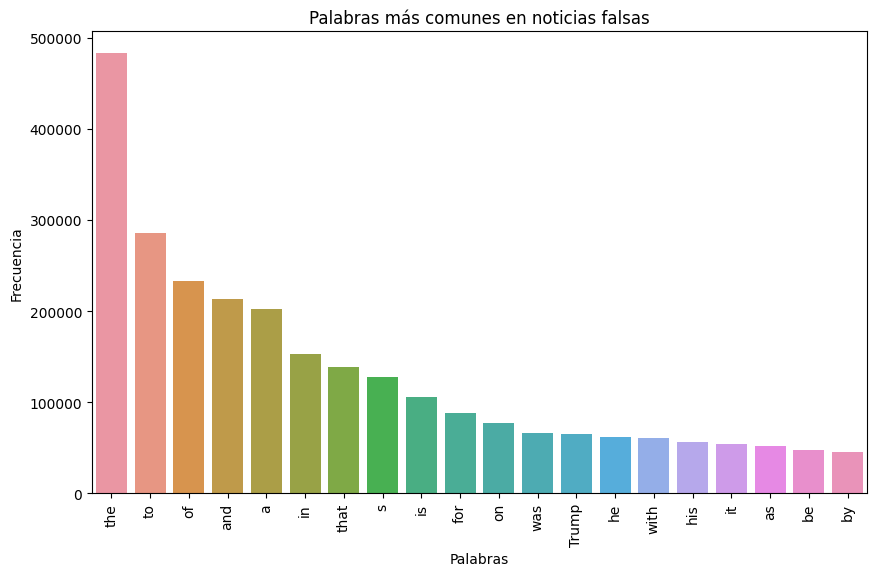

In [155]:
# Combinar el texto de las noticias falsas en una sola cadena
all_text_fake = ' '.join(fake_news['text'].tolist())

# Separar las palabras y contar su frecuencia
fake_news_words_list = all_text_fake.split()
word_counts_fake = Counter(fake_news_words_list)

# Obtener las 20 palabras más comunes y crear un DataFrame
fake_news_words_df = pd.DataFrame(word_counts_fake.most_common(20), columns=['Word', 'Count'])

# Crear un gráfico de barras para visualizar las palabras más comunes en noticias falsas
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=fake_news_words_df)
plt.xticks(rotation='vertical')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras más comunes en noticias falsas')
plt.show()


Si bien varias se repiten es interesante ver que existen pequeñas diferencias entre los conjuntos.


# Separar en datos de entrenamiento y datos de prueba

Separaremos manualmente un conjunto de datos de prueba para su posterior evaluación.Luego eliminamos las últimas 10 filas de cada conjunto de datos, para guardarlas en variables separadas para ser utilizadas como datos de prueba.

In [ ]:
fake_news_manual_testing = fake_news.tail(10)
for i in range(23480,23470,-1):
    fake_news.drop([i], axis = 0, inplace = True)
true_news_manual_testing = true_news.tail(10)
for i in range(21416,21406,-1):
    true_news.drop([i], axis = 0, inplace = True)

In [ ]:
fake_news.shape, true_news.shape # Devuelve el tamaño del conjunto de datos

((23471, 5), (21407, 5))

In [ ]:
fake_news_manual_testing["class"] = 0
true_news_manual_testing["class"] = 1

<ipython-input-95-a2e63799100d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_manual_testing["class"] = 0
<ipython-input-95-a2e63799100d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_news_manual_testing["class"] = 1


In [ ]:
fake_news_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
true_news_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1



A continuacion combinamos los conjuntos de datos **fake** y **true** en uno solo llamado **df_manual_testing**. Luego, has guardado este nuevo conjunto de datos en un archivo CSV llamado "manual_testing.csv".

Esto nos permite tener un conjunto de datos de prueba combinado y etiquetado adecuadamente para realizar pruebas con tu modelo después de entrenarlo.

In [ ]:
df_manual_testing = pd.concat([fake_news_manual_testing,true_news_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [ ]:
df_unido = pd.concat([fake_news, true_news], axis =0 )
df_unido.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
df_unido.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
df = df_unido.drop(["title", "subject","date"], axis = 1)

In [ ]:
df.isnull().sum()

text     0
class    0
dtype: int64

Ahora, estamos tomando una muestra aleatoria del DataFrame, donde frac=1 indica que se debe tomar el 100% de las filas.

Esta técnica de mezcla aleatoria es comúnmente utilizada para aleatorizar el orden de las filas en conjuntos de datos, lo que puede ser útil para el entrenamiento de modelos o para evitar cualquier sesgo en el orden de los datos.

In [ ]:
df = df.sample(frac = 1)
df.head()

,text,class
3931,WASHINGTON (Reuters) - The U.S. House Rules co...,1
16548,DOHA (Reuters) - Qatar has signed 36 worker pr...,1
6937,MANILA/WASHINGTON (Reuters) - Philippines lead...,1
7049,WASHINGTON (Reuters) - U.S. Vice President-ele...,1
18585,A Georgia middle school science teacher and a ...,0


In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)


Después de estos pasos, eL DataFrame tiene un nuevo índice reiniciado y la columna "index" que contenía los valores antiguos del índice ha sido eliminada.

In [ ]:
df.columns

Index(['text', 'class'], dtype='object')

Este tipo de función, busca limpiar y preparar texto antes de realizar el análisis de datos o entrenar los modelos de aprendizaje automático.

In [ ]:
def wordopt(text):
    text = text.lower()                # Convertir el texto a minúsculas
    text = re.sub('\[.*?\]', '', text) # Eliminar texto entre corchetes, por ejemplo, referencias o elementos no deseados
    text = re.sub("\\W"," ",text)      # Reemplazar caracteres no alfanuméricos con espacios
    text = re.sub('https?://\S+|www\.\S+', '', text)                # Eliminar URLs o enlaces web
    text = re.sub('<.*?>+', '', text)                               # Eliminar etiquetas HTML
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Eliminar signos de puntuación
    text = re.sub('\n', '', text)                                   # Eliminar saltos de línea
    text = re.sub('\w*\d\w*', '', text)    # Eliminar palabras que contienen números
    return text                            # Devolver el texto procesado

Al hacer esto, estamos limpiando y preprocesando el texto en la columna "text" del DataFrame, preparándolo para análisis posteriores.



In [ ]:
df["text"] = df["text"].apply(wordopt)

Este código está asignando las columnas "text" y "class" a las variables x y y respectivamente.

Esto prepara los datos para utilizarlos en el entrenamiento de un modelo de aprendizaje automático, donde X contendrá las características de entrada y Y las etiquetas correspondientes que el modelo intentará predecir.

In [ ]:
x = df["text"] # contendra los datos de texto
y = df["class"] # contendra las etiquetas de de verdadero y falso

Este código utiliza la función train_test_split de la librería sklearn para dividir los datos en conjuntos de entrenamiento y prueba. La división se hace utilizando las variables x (características) y y (etiquetas) que preparaste anteriormente.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

Ahora vectorizaremos los datos de texto para posteriormente procesarlos.

Esta transformación es fundamental para que los modelos de aprendizaje automático puedan trabajar con datos de texto, convirtiéndolos en matrices numéricas que los algoritmos puedan entender y procesar.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Realizar varios modelos de Machine Learning:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Creación del modelo y ajuste (entrenamiento)
LR = LogisticRegression()
DT = DecisionTreeClassifier()
GBC = GradientBoostingClassifier(random_state=0)
#RFC = RandomForestClassifier(random_state=0)

# Entrenar los modelos con los datos
LR.fit(xv_train,y_train)
DT.fit(xv_train, y_train)
GBC.fit(xv_train, y_train)
#RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

**Nota:** Para que el procesamiento de los datos fuese más rápido y tuviese menos errores. Solo dejamos 3 modelos

### 1. Regresión Logística

In [ ]:
pred_lr=LR.predict(xv_test)
LR.score(xv_test, y_test)

0.9867201426024955

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5822
           1       0.98      0.99      0.99      5398

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### 2. Árbol de decisión

In [ ]:
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.9964349376114082

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5822
           1       1.00      1.00      1.00      5398

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



### 3. Gradient Boosting Classifier

In [ ]:
pred_gbc = GBC.predict(xv_test)
GBC.score(xv_test, y_test)

0.9954545454545455

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5822
           1       0.99      1.00      1.00      5398

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



# Realizar algún tipo de validación:

In [ ]:
# Validación cruzada k-fold
LR_scores = cross_val_score(LR, xv_train, y_train, cv=5)  # cv=5 indica 5 pliegues (folds) para la validación cruzada
DT_scores = cross_val_score(DT, xv_train, y_train, cv=5)
#GBC_scores = cross_val_score(GBC, xv_train, y_train, cv=5)
#RFC_scores = cross_val_score(RFC, xv_train, y_train, cv=5)

In [ ]:
# Muestra los puntajes promedio de validación cruzada para cada modelo
print("Regresión Logística - Puntaje promedio:", LR_scores.mean())
print("Árbol de decisión - Puntaje promedio:", DT_scores.mean())
#print("Gradient Boosting - Puntaje promedio:", GBC_scores.mean())
#print("Random Forest - Puntaje promedio:", RFC_scores.mean())

Regresión Logística - Puntaje promedio: 0.9850853126509221
Árbol de decisión - Puntaje promedio: 0.9949195212721303


Estos puntajes representan la precisión promedio de los modelos en diferentes divisiones del conjunto de datos y pueden ser útiles para comparar qué modelos funcionan mejor en los datos proporcionados.

# Evaluación y análisis del rendimiento de cada modelo:

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
# Función para imprimir métricas
def print_metrics(model_name, y_true, y_pred):
    print(f"Modelo: {model_name}")
    print("Matriz de Confusión:")
    print(confusion_matrix(y_true, y_pred))
    print("Precisión:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("\n")

# Calcula y muestra las métricas para cada modelo
print_metrics("Regresión Logística", y_test, LR.predict(xv_test))
print_metrics("Árbol de decisión", y_test, DT.predict(xv_test))
#print_metrics("Gradient Boosting", y_test, GBC.predict(xv_test))
#print_metrics("Random Forest", y_test, RFC.predict(xv_test))

Modelo: Regresión Logística
Matriz de Confusión:
[[5739   83]
 [  66 5332]]
Precisión: 0.9846722068328716
Recall: 0.9877732493516117
F1-Score: 0.9862202903911957


Modelo: Árbol de decisión
Matriz de Confusión:
[[5803   19]
 [  21 5377]]
Precisión: 0.9964788732394366
Recall: 0.99610967024824
F1-Score: 0.9962942375393736




**Regresión Logística:**

*   La matriz de confusión muestra que tiene un número bajo de falsos positivos (83) y falsos negativos (66).
*   La precisión es alta (0.984), lo que indica que la mayoría de las predicciones positivas son correctas.
*   El recall también es alto (0.988), lo que sugiere que la mayoría de los valores positivos reales se capturan correctamente.

**Árbol de Decisión:**

*   La matriz de confusión muestra un rendimiento aún mejor con solo 19 falsos positivos y 21 falsos negativos.
*   La precisión es muy alta (0.996), lo que sugiere una precisión excepcional en las predicciones positivas.
*   El recall también es alto (0.996), lo que indica una captura efectiva de los valores positivos reales.

# Ajustar para cada uno de los modelos los hiper parámetros:

Se decidió utilizar de entre los métodos, solo Random Search; ya que Grid Search es más exhaustivo, pero puede ser costoso computacionalmente. Por otro lado, Random Search es más eficiente en recursos, aunque no garantiza encontrar la mejor combinación.

### Random Search con Decision Tree:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# Definición del modelo y espacio de hiperparámetros para la búsqueda aleatoria
dt_model = DecisionTreeClassifier()
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20)
}

# Random Search para Decision Tree
dt_random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=dt_params, n_iter=10, cv=5)
dt_random_search.fit(xv_train, y_train)

# Mejor modelo y sus hiperparámetros
best_dt_model = dt_random_search.best_estimator_
best_dt_params = dt_random_search.best_params_



### Random Search con Logistic Regression:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Definición del modelo y espacio de hiperparámetros para la búsqueda aleatoria
lr_model = LogisticRegression()
lr_params = {
    'C': uniform(0.1, 10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Random Search para Logistic Regression
lr_random_search = RandomizedSearchCV(estimator=lr_model, param_distributions=lr_params, n_iter=10, cv=5)
lr_random_search.fit(xv_train, y_train)

# Mejor modelo y sus hiperparámetros
best_lr_model = lr_random_search.best_estimator_
best_lr_params = lr_random_search.best_params_


# Realizar un ensamble de los modelos:

In [ ]:
from sklearn.ensemble import VotingClassifier

# Crea un ensamble de modelos
voting_clf = VotingClassifier(
    estimators=[
        ('decision_tree', best_dt_model),
        ('logistic_regression', best_lr_model)
        # Puedes agregar más modelos aquí si lo deseas
    ],
    voting='soft'  # O 'hard' dependiendo de la estrategia de votación
)

# Entrena el ensamble
voting_clf.fit(xv_train, y_train)

# Predicción y evaluación
y_pred_ensemble = voting_clf.predict(xv_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)


# Evaluación y análisis del rendimiento:

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Matriz de confusión
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print("Matriz de Confusión del Ensamble:")
print(conf_matrix_ensemble)

# Precisión, recall y F1-score
precision_ensemble = precision_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)

print(f"Precisión del Ensamble: {precision_ensemble}")
print(f"Recall del Ensamble: {recall_ensemble}")
print(f"F1-Score del Ensamble: {f1_ensemble}")


Matriz de Confusión del Ensamble:
[[5805   17]
 [  10 5388]]
Precisión del Ensamble: 0.996854764107308
Recall del Ensamble: 0.9981474620229714
F1-Score del Ensamble: 0.9975006942515967


La matriz de confusión muestra que el ensamble tiene muy pocos falsos positivos y falsos negativos, lo que indica una alta precisión y recall. Además, el F1-score, que combina precisión y recall, también es alto, lo que sugiere un buen rendimiento general del modelo de ensamble.

Estos resultados son bastante prometedores y podrían indicar que el modelo de ensamble está funcionando muy bien para clasificar las noticias verdaderas y falsas.

# Prueba de modelo con entrada manual

A continuacion podemos copiar cualquier texto de las noticias dadas al principio del problema y la funcion resolvera si esta es verdadera o falsa.

In [ ]:
# Función para probar manualmente con un texto de noticia
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "No es una Fake News"

def manual_testing(news):
    testing_news = {"text": [news]}                           # Crea un diccionario con el texto de la noticia
    new_def_test = pd.DataFrame(testing_news)                 # Crea un DataFrame a partir del diccionario
    new_def_test["text"] = new_def_test["text"].apply(wordopt) # Aplica el preprocesamiento al texto de la noticia
    new_x_test = new_def_test["text"]                          # Extrae el texto preprocesado
    new_xv_test = vectorization.transform(new_x_test)          # Convierte el texto preprocesado a su representación vectorizada
    # Realiza predicciones usando los modelos entrenados
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                              output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))

news = str(input("Ingrese la noticia a verificar: "))
manual_testing(news)


Ingrese la noticia a verificar: SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for Obras Arranjadas pelo Sogro - or Work Arranged by the Fat

**Ejemplo de texto Fake News para copiar:**

21st Century Wire says This week, the historic international Iranian Nuclear Deal was punctuated by a two-way prisoner swap between Washington and Tehran, but it didn t end quite the way everyone expected. On the Iranian side, one of the U.S. citizens who was detained in Iran, Nosratollah Khosravi-Roodsari, has stayed in Iran, but on the U.S. side all 7 of the Iranians held in U.S. prisons DID NOT show up to their flight to Geneva for the prisoner exchange with at least 3 electing to stay in the U.S TEHRAN SIDE: In Iran, 5 U.S. prisoners were released, with 4 of them making their way to Germany via Switzerland.Will Robinson Daily MailNone of the Iranians freed in the prisoner swap have returned home and could still be in the United States, it has been reported.The seven former inmates, who were released as part of a deal with the Islamic republic, did not show up to get a flight to Geneva, Switzerland, where the exchange was set to take place on Sunday.Three of the Iranians have decided to stay in the United States, ABC reported, with some moving in with their families. However it is not known where the other four are.Three of the Americans who had been detained in Iran Washington Post journalist Jason Rezaian, former U.S. Marine Amir Hekmati and Christian pastor Saeed Abedini left Tehran at around 7am the same day, but weren t met by their counterparts in Switzerland Continue this story at the Mail OnlineREAD MORE IRAN NEWS AT: 21st Century Wire Iran Files

**Ejemplo de texto True News para copiar:**

SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for Obras Arranjadas pelo Sogro - or Work Arranged by the Father-In-Law. After years of steady growth triggered by a flurry of massive government contracts, OAS was ensnared in Operation Car Wash which unearthed an illegal contracting ring between state firms and builders. The ensuing scandal helped topple former Brazilian President Dilma Rousseff last year. Trained as an engineer, Mata Pires founded OAS with two colleagues in 1976 to do sub-contracting work for larger rival Odebrecht SA - the biggest of the builders involved in the probe. Before the scandal, Forbes magazine estimated Mata Pires fortune at $1.6 billion. He dropped off the magazine s billionaire list in 2015, months after OAS sought bankruptcy protection after the Car Wash scandal. While Mata Pires was never accused of wrongdoing in the investigations, creditors demanded he and his family stay away from the builder s day-to-day operations, people directly involved in the negotiations told Reuters at the time. He is survived by his wife and his two sons.